<a href="https://colab.research.google.com/github/g-bhuvanareddy/Alfido-Tech/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Loading dataset
mov_data=pd.read_csv('/content/movies.dat',sep='::',engine='python',encoding='latin',names=['MovieIDs','MovieName','Category'])
rate_data=pd.read_csv('/content/ratings.dat.zip',sep='::',engine='python',encoding='latin',names=['ID','MovieID','Ratings','TimeStamp'])
user_data=pd.read_csv('/content/users.dat',sep='::',engine='python',encoding='latin',names=['UserID','Gender','Age','Ocupation','Zip-code'])

In [ ]:
## Data Summary
print(mov_data.head(),mov_data.dtypes,mov_data.shape,'--------------------------------\n',sep='\n\n')
print(rate_data.head(),rate_data.dtypes,rate_data.shape,'--------------------------------\n',sep='\n\n')
print(user_data.head(),user_data.dtypes,user_data.shape,'--------------------------------\n',sep='\n\n')

print("-----Null values in Movie data----- ",mov_data.isnull().sum(),sep="\n",)
print("\n-----Null values in Rating data----- ",rate_data.isnull().sum(),sep="\n",)
print("\n-----Null values in User data----- ",user_data.isnull().sum(),sep="\n",)

   MovieIDs                           MovieName                      Category
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

MovieIDs      int64
MovieName    object
Category     object
dtype: object

(3883, 3)

--------------------------------

   ID  MovieID  Ratings  TimeStamp
0   1     1193        5  978300760
1   1      661        3  978302109
2   1      914        3  978301968
3   1     3408        4  978300275
4   1     2355        5  978824291

ID           int64
MovieID      int64
Ratings      int64
TimeStamp    int64
dtype: object

(1000209, 4)

--------------------------------

   UserID Gender  Age  Ocupation Zip-code
0       1      F   

In [ ]:
conc_dat=pd.concat([mov_data,rate_data,user_data],axis=1)
X=conc_dat.copy()
X=X.dropna(axis="index")
X=X.sample(len(X))
print(X.dtypes,'\n',X.shape)

MovieIDs     float64
MovieName     object
Category      object
ID             int64
MovieID        int64
Ratings        int64
TimeStamp      int64
UserID       float64
Gender        object
Age          float64
Ocupation    float64
Zip-code      object
dtype: object 
 (3883, 12)


In [ ]:
##finding correlations
s=(X.dtypes==object)
S=s[s].index
X_corr=X.copy().drop(columns=S)
cor=X_corr.corr()
cor["Ratings"]

MovieIDs    -0.153298
ID          -0.150804
MovieID     -0.071695
Ratings      1.000000
TimeStamp   -0.008635
UserID      -0.153561
Age         -0.017635
Ocupation   -0.001090
Name: Ratings, dtype: float64

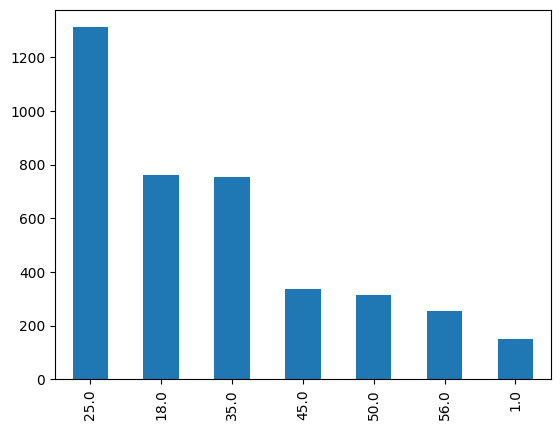

In [ ]:
X["Age"].value_counts().plot(kind="bar")
plt.show()

Text(0.5, 0, 'Age')

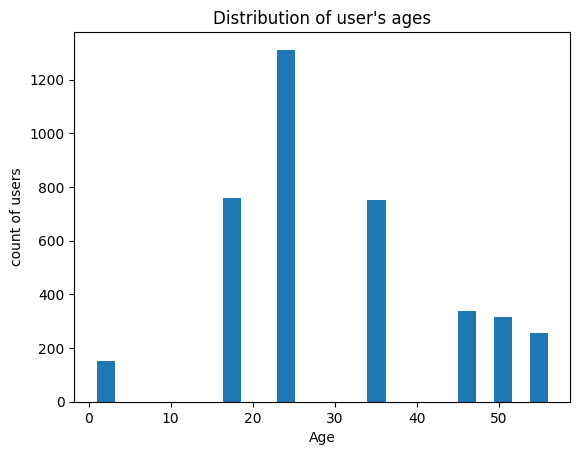

In [ ]:
X.Age.plot.hist(bins=25)
plt.title("Distribution of user's ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [ ]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
X['age_group'] = pd.cut(X.Age, range(0, 81, 10), right=False, labels=labels)
X[['Age', 'age_group']].drop_duplicates()[:10]
X=X.drop(columns="Age")

In [ ]:
X.dtypes

MovieIDs      float64
MovieName      object
Category       object
ID              int64
MovieID         int64
Ratings         int64
TimeStamp       int64
UserID        float64
Gender         object
Ocupation     float64
Zip-code       object
age_group    category
dtype: object

In [ ]:
#removing least relevent columns
col_to_be_remove=["MovieIDs","MovieName","MovieID","TimeStamp","UserID","Zip-code"]
X=X.drop(columns=col_to_be_remove)

In [ ]:
# Manging Categorical columns
from sklearn.preprocessing import OneHotEncoder
object_cols=(X.dtypes==object)
object_cols=list(object_cols[object_cols].index)
object_cols.append("age_group")
OH_encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))
OH_cols.index = X.index
num_X = X.drop(object_cols, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
OH_X.columns = OH_X.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y=pd.Series(X["Ratings"])
X=X.drop(columns="Ratings")

In [ ]:
OH_X

,ID,Ratings,Ocupation,0,1,2,3,4,5,6,...,299,300,301,302,303,304,305,306,307,308
3431,26,3,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
622,8,3,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3154,24,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1769,17,4,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
785,9,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,9,4,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3053,23,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1231,11,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3782,27,3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(OH_X,y,train_size=0.8,test_size=0.2)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_valid)
acc_log = round(logreg.score(X_valid, y_valid) * 100, 2)
acc_log

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_pred,y_valid)

0.11068211068211069

In [ ]:
import joblib
joblib.dump(logreg,"movie_rating_prediction_model")

['movie_rating_prediction_model']